In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
this_path = os.getcwd()
base_path = this_path.split('scripts')[0]
ring_path = base_path + 'dchi_masks/'
noring_path = base_path + 'dchi_masks_noring/'

In [5]:
ring_files = os.listdir(ring_path)
noring_files = os.listdir(noring_path)
ring_files_b = [file for file in ring_files if 'dchi_b' in file]
noring_files_b = [file for file in noring_files if 'dchi_b' in file]
noring_files_sb = [file for file in noring_files if 'dchi_sb' in file]

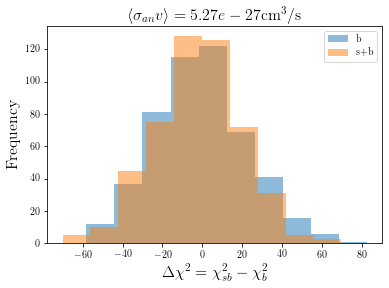

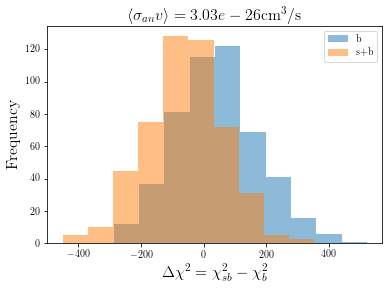

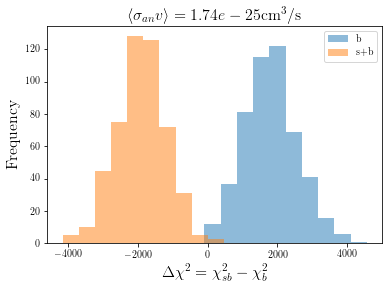

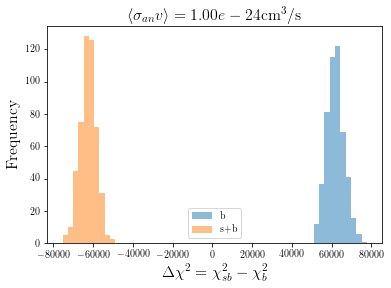

In [11]:
mx_ar = np.round(np.logspace(np.log10(6), np.log10(500), 20), 1)
sigmav_ar = np.logspace(-27, -24, 80)
mx_ind = np.where(mx_ar==38.6)[0][0]
noringf_sb = noring_files_sb[20]
dchi_noring_sb  = np.load(noring_path + noringf_sb)
noringf_b = noring_files_b[10]
dchi_noring_b  = np.load(noring_path + noringf_b)
sigmav_inds = [19, 39, 59, 79]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for ind in sigmav_inds:
    fig = plt.figure()
    plt.hist(dchi_noring_b[0, mx_ind, ind], label='b', alpha=.5)
    plt.hist(dchi_noring_sb[0, mx_ind, ind], label='s+b', alpha=.5)
    plt.title(r'$\langle\sigma_{an}v\rangle = ' + '{:.2e}'.format(sigmav_ar[ind]) + r'\mathrm{cm^3/s}$', size=16)
    plt.xlabel(r'$\Delta \chi^2 = \chi^2_{sb}-\chi^2_b$', size=16)
    plt.ylabel('Frequency', size=16)
    plt.legend()
    plt.savefig(base_path + 'figs/small_data_dchi_hist_sigmav'+ '{:.2e}'.format(sigmav_ar[ind]) + '.pdf')


In [79]:
ringf = ring_files_b[24] #random b file
print(ringf)
noringf = noring_files_b[20] #random b file
print(noringf)
dchi_ring = np.load(ring_path + ringf)
dchi_noring  = np.load(noring_path + noringf) 

dchi_b_starting_sample_2500_numsamps_500_D0_3e+28_mask_thicknesses_0.00e+00_1.24e-02_sigmav_logspace_-28_-25_80_mx_logspace_6_500_20.npy
dchi_b_noring_starting_sample_22000_numsamps_500_D0_3e+28_mask_thicknesses_0.00e+00_1.24e-02_sigmav_logspace_-28_-25_80_mx_logspace_6_500_20.npy


In [80]:
dchi_ring_sort = np.sort(dchi_ring)
dchi_noring_sort = np.sort(dchi_noring)

In [81]:
sh = dchi_ring_sort.shape
N = sh[-1]

In [82]:
mean_ring = np.mean(dchi_ring, axis=3)
sd_ring = np.std(dchi_ring, axis=3)
sdofmean_ring = sd_ring/np.sqrt(N)
mean_noring = np.mean(dchi_noring, axis=3)
sd_noring = np.std(dchi_noring, axis=3)
sdofmean_noring = sd_noring/np.sqrt(N)
chisq_dchisq_elemwise = (mean_noring-mean_ring)**2/sdofmean_noring**2
chisq_dchisq = np.sum(chisq_dchisq_elemwise, axis=(1,2))

In [83]:
print(chisq_dchisq)

[5.92997388e+07 2.60666392e+07 6.85672180e+06 1.07905590e+06
 9.33483804e+04 4.16826757e+03 5.84675884e+03 1.72347222e+03
 1.27759071e+03 1.43963912e+03]


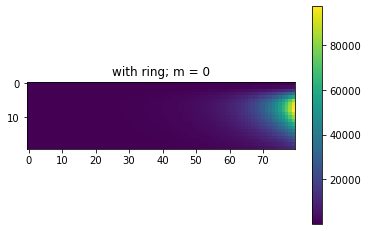

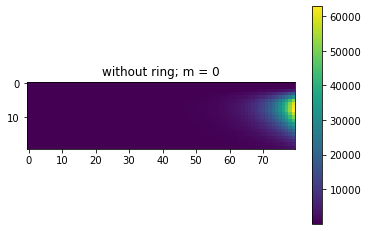

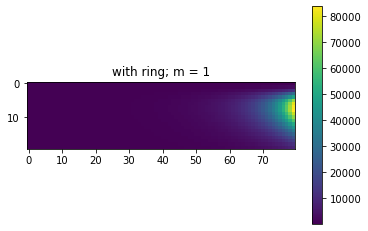

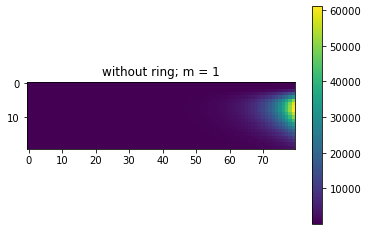

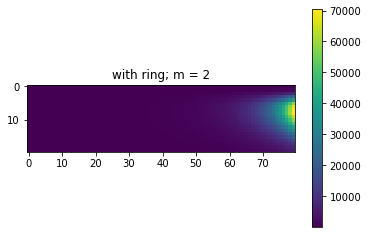

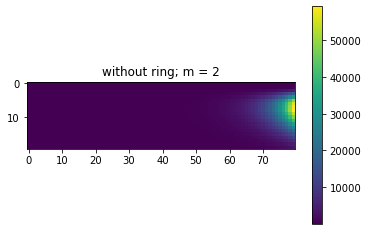

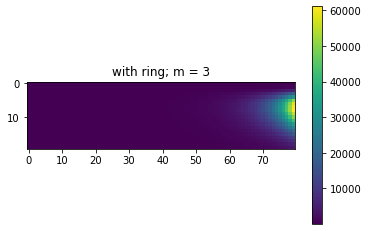

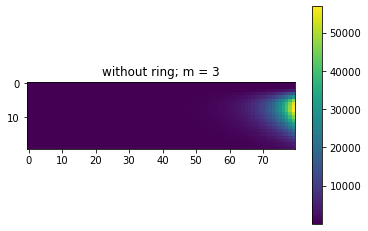

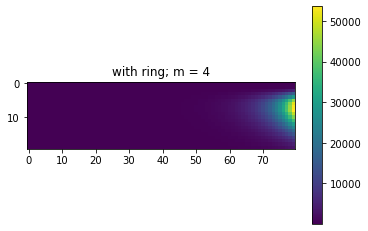

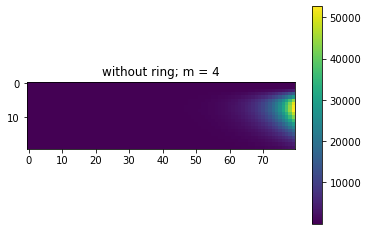

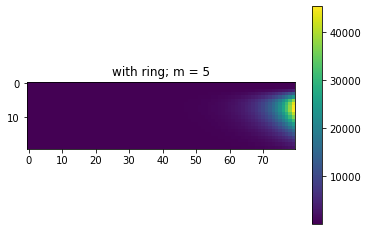

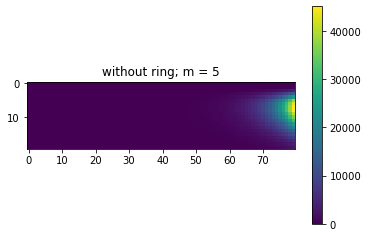

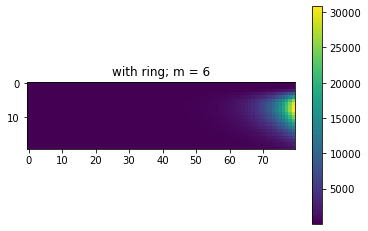

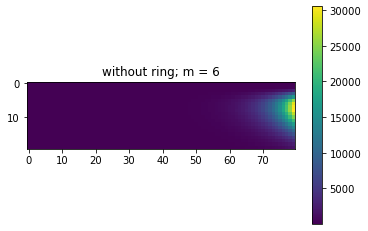

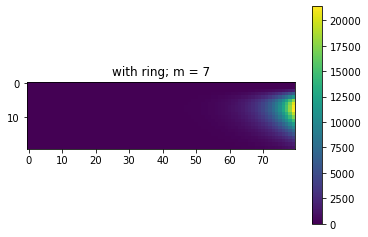

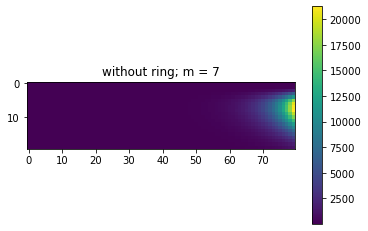

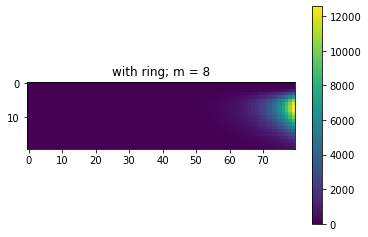

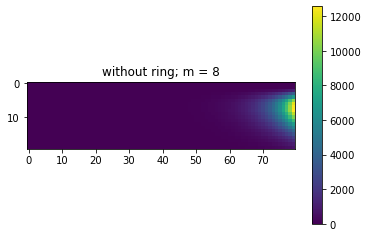

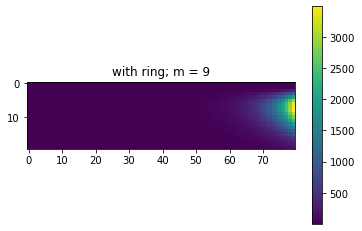

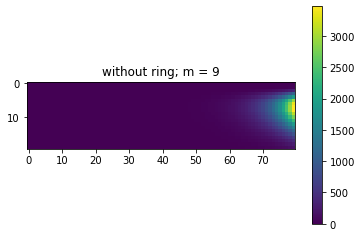

In [22]:
for i in range(10):
    fig = plt.figure()
    plt.imshow(perc50_ring[i])
    plt.title('with ring; m = ' + str(i))
    plt.colorbar()
    fig = plt.figure()
    plt.imshow(perc50_noring[i])
    plt.title('without ring; m = ' + str(i))
    plt.colorbar()